In [47]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [48]:

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [49]:
data.shape

(4177, 9)

In [50]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [51]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [53]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

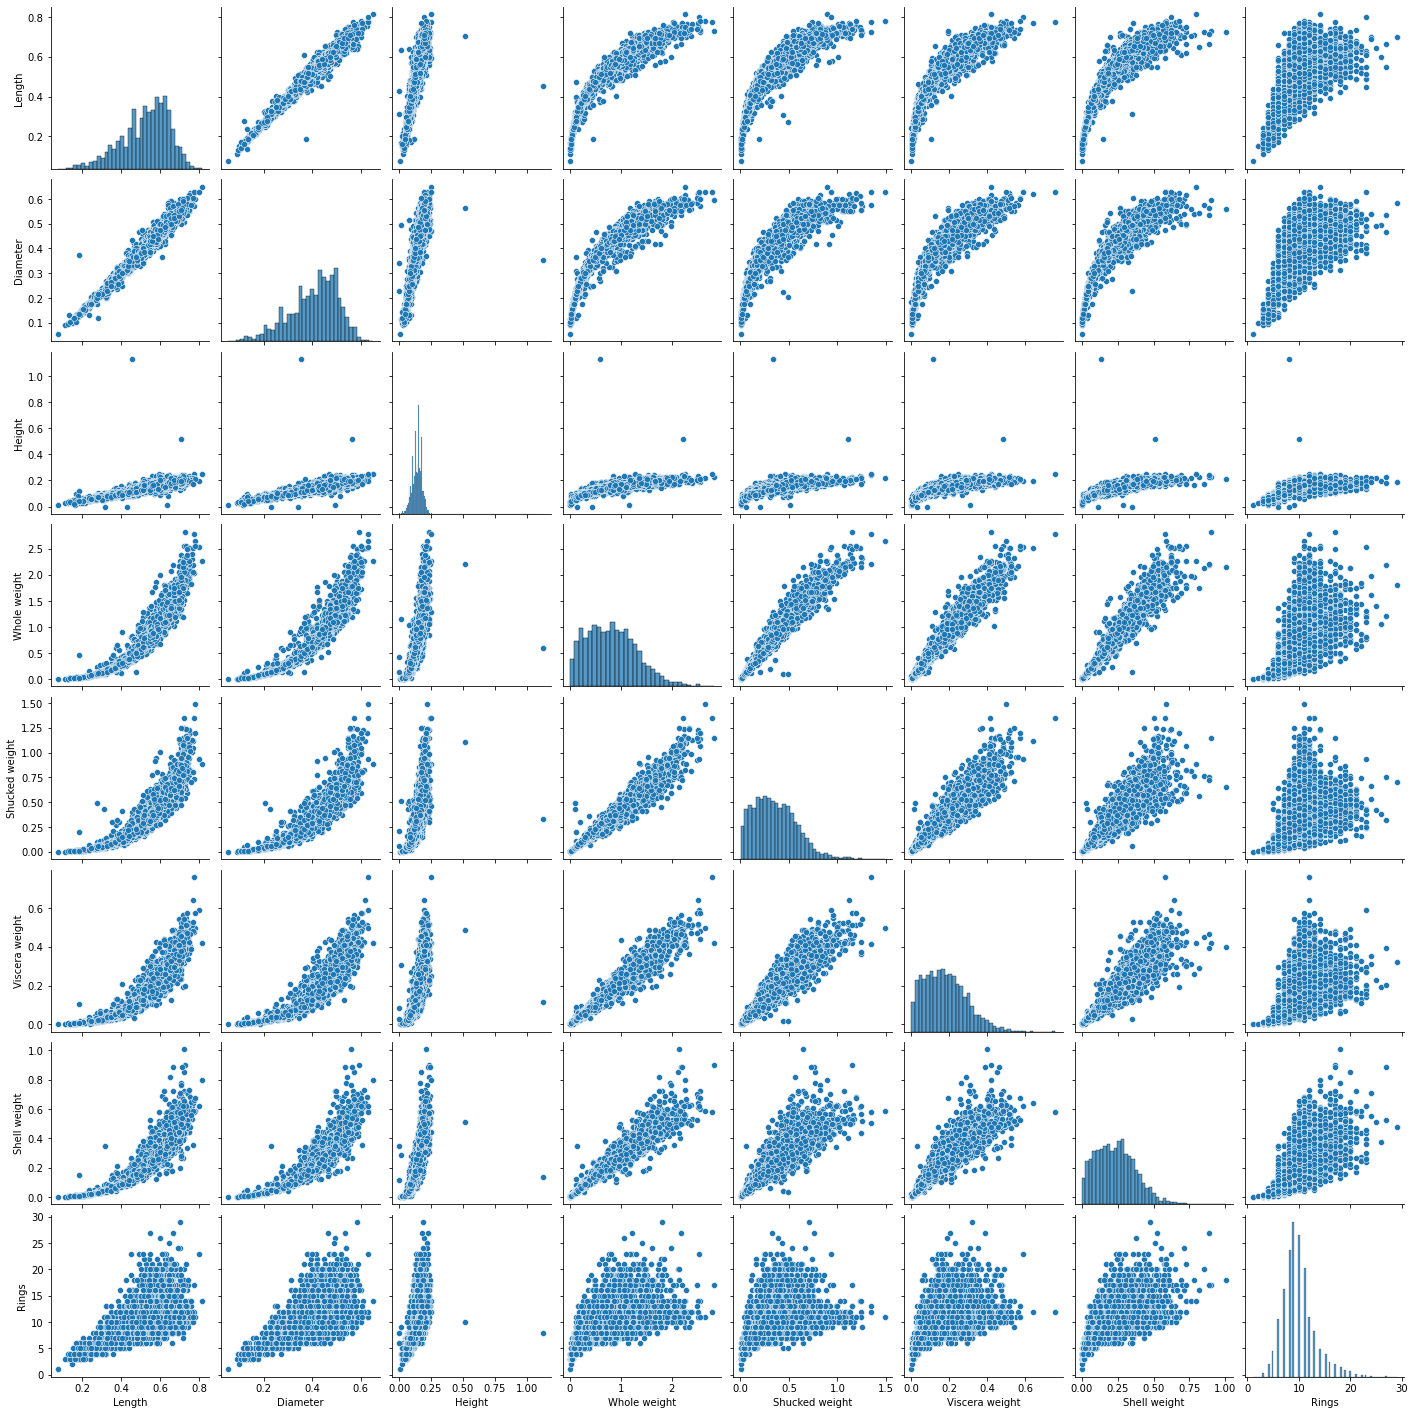

In [54]:
sns.pairplot(data)

In [55]:
data.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

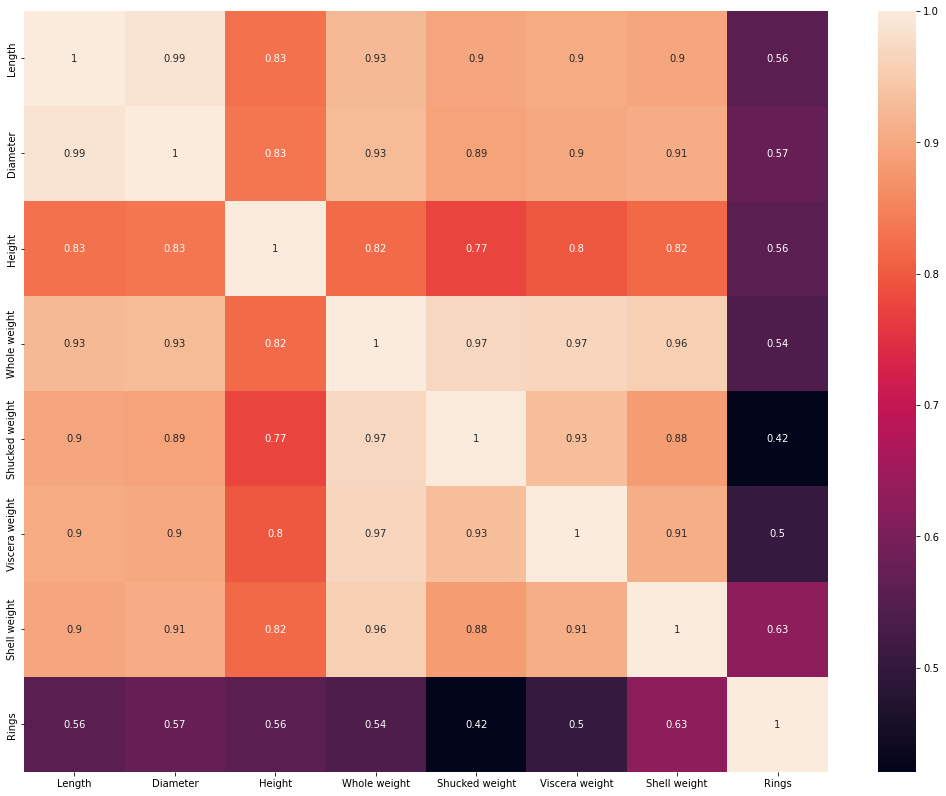

In [56]:
df_corr=data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True, annot_kws={'size':10})
plt.show()

In [57]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Rings vs length and sex')

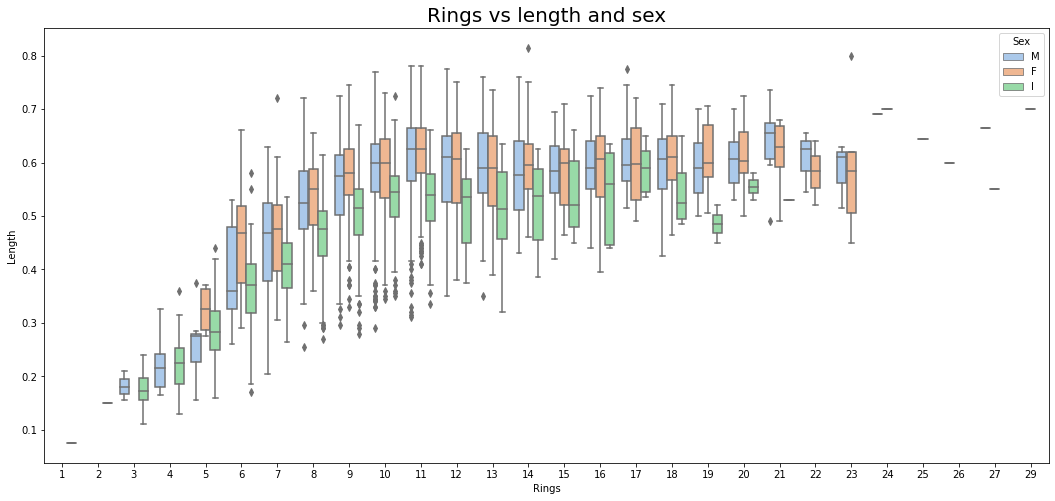

In [58]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.boxplot(data['Rings'], data['Length'], hue = data['Sex'], palette = 'pastel')
plt.title('Rings vs length and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs diameter and sex')

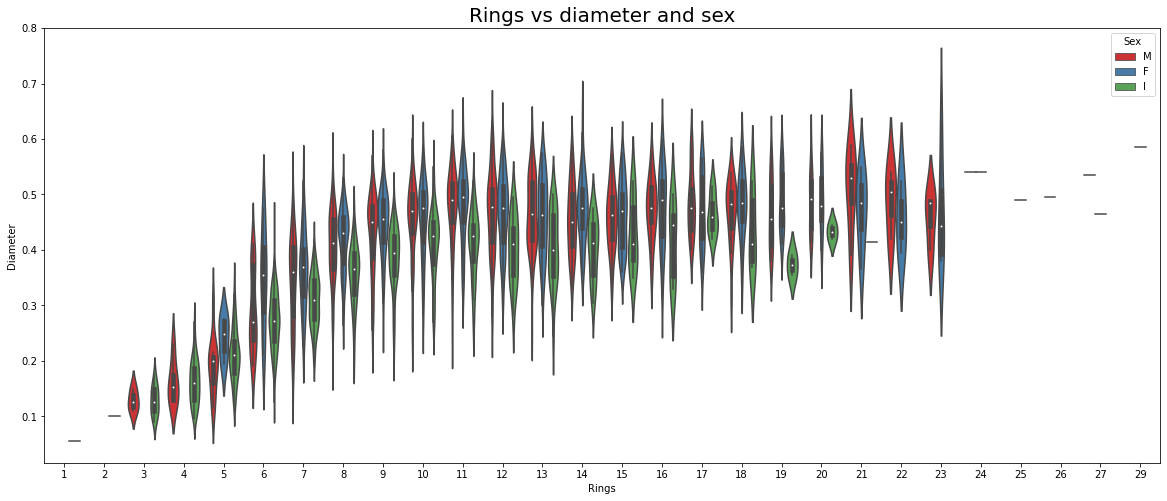

In [59]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.violinplot(data['Rings'], data['Diameter'], hue = data['Sex'], palette = 'Set1')
plt.title('Rings vs diameter and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs height and sex')

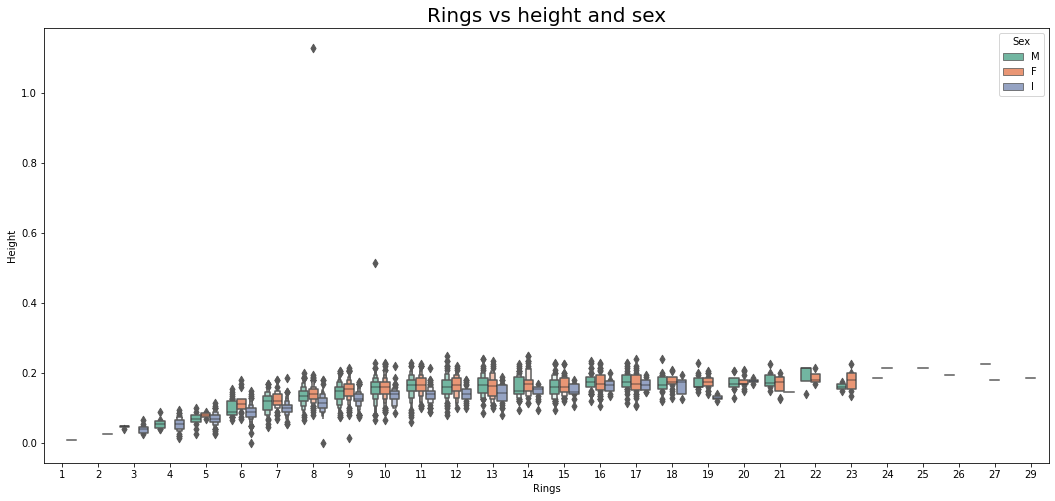

In [60]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.boxenplot(data['Rings'], data['Height'], hue = data['Sex'], palette = 'Set2')
plt.title('Rings vs height and sex', fontsize = 20)

Text(0.5, 1.0, 'Rings vs weight')

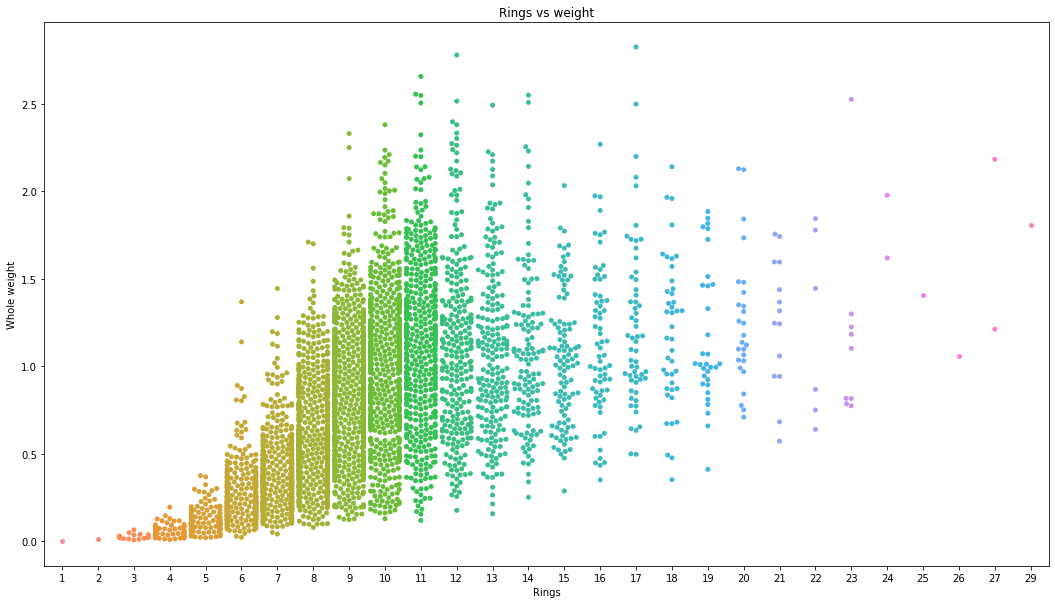

In [61]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(data['Rings'], data['Whole weight'])
plt.title('Rings vs weight')

Text(0.5, 1.0, 'Rings vs shucked weight')

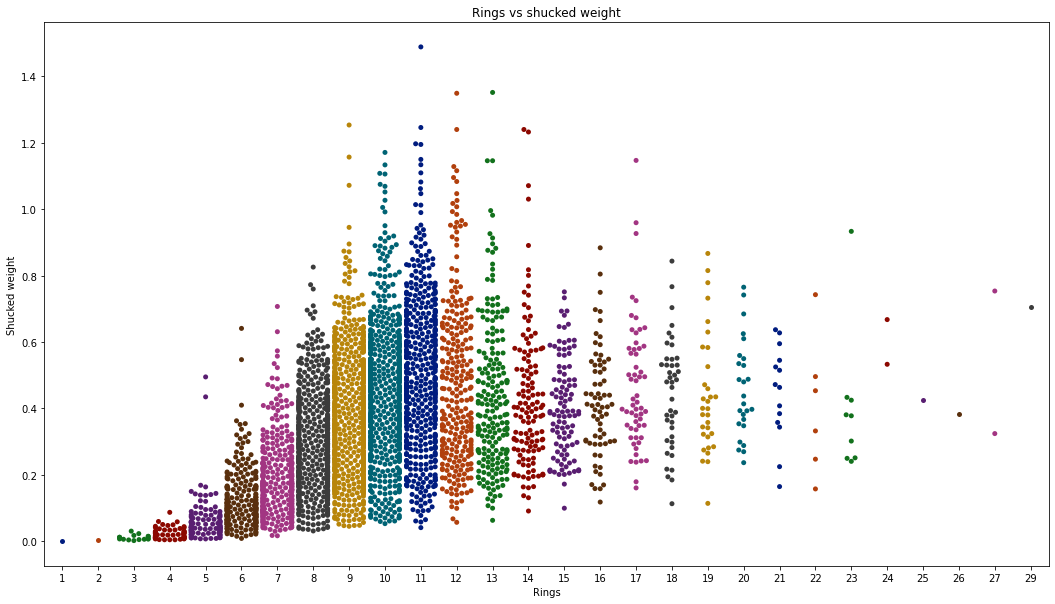

In [62]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.swarmplot(data['Rings'], data['Shucked weight'], palette = 'dark')
plt.title('Rings vs shucked weight')

Text(0.5, 1.0, 'Rings vs Viscera Weight')

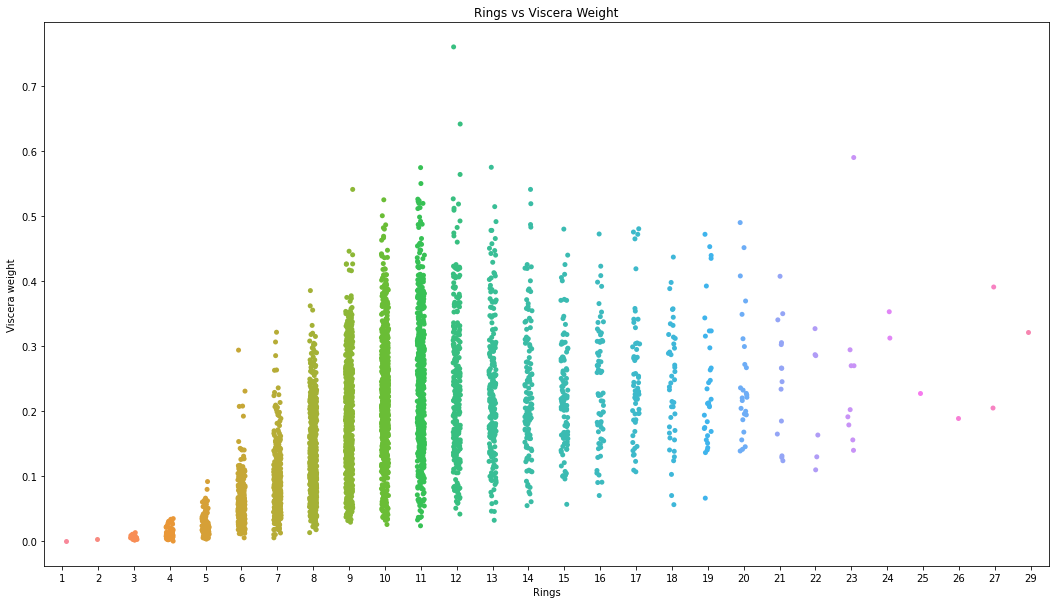

In [63]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.stripplot(data['Rings'], data['Viscera weight'])
plt.title('Rings vs Viscera Weight')

Text(0.5, 1.0, 'Rings vs Shell weight')

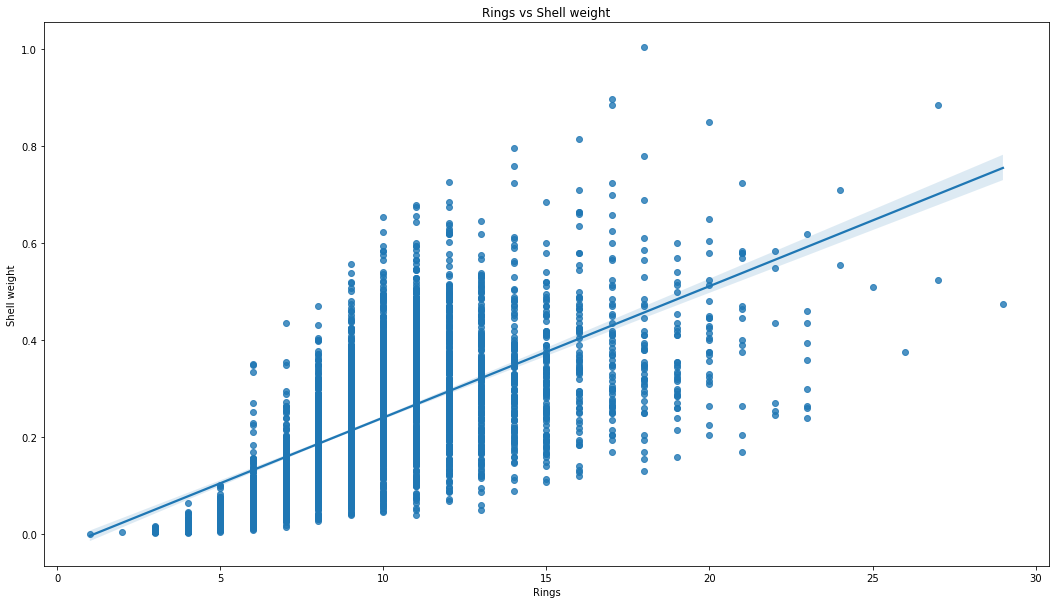

In [64]:
plt.rcParams['figure.figsize'] = (18, 10)
sns.regplot(data['Rings'], data['Shell weight'])
plt.title('Rings vs Shell weight')

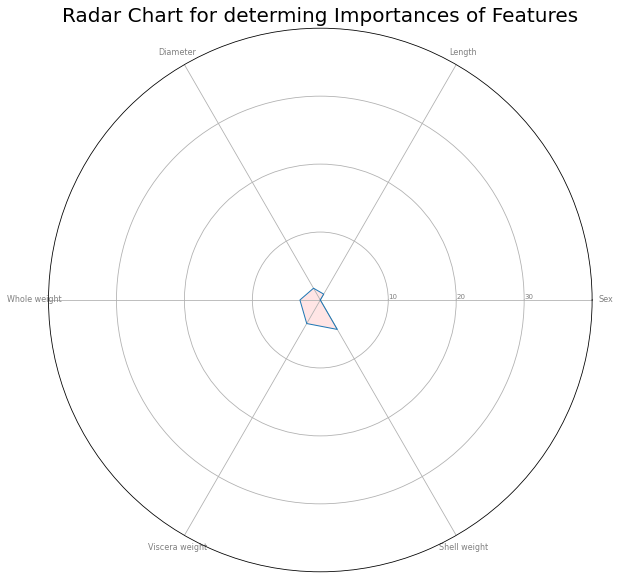

In [65]:
from math import pi

# Set data
df = pd.DataFrame({
'group': [i for i in range(0, 4177)],
'Sex': data['Sex'],
'Length': data['Length'],
'Diameter': data['Diameter'],
'Whole weight':  data['Whole weight'],
'Viscera weight': data['Viscera weight'],
'Shell weight': data['Shell weight']
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 20) 
# Fill area
ax.fill(angles, values, 'red', alpha=0.1)

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

data['Sex'].value_counts()


data = pd.get_dummies(data)

In [67]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [68]:
# splitting the dependent and independent variables

y = data['Rings']
data = data.drop(['Rings'], axis = 1)
x = data

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (4177, 8)
Shape of y: (4177,)


In [23]:
# train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (3341, 8)
Shape of x_test : (836, 8)
Shape of y_train : (3341,)
Shape of y_test : (836,)


In [69]:
# MODELLING
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# r2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score :", r2)

RMSE : 2.547867106867698
R2 Score : 0.4022614340438786


In [70]:
!pip install eli5

In [71]:
# let's check the importance of each attributes


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0342 ± 0.0201,Shell weight
0.0148 ± 0.0108,Viscera weight
0.0105 ± 0.0079,Shucked weight
0.0019 ± 0.0109,Length
-0.0038 ± 0.0127,Height
-0.0043 ± 0.0098,Sex
-0.0110 ± 0.0193,Whole weight
-0.0117 ± 0.0082,Diameter


In [72]:
data["M"] = np.nan
data["F"] = np.nan
data["I"] = np.nan
columnName='Sex'
for i in range (len(data[columnName])):
    if data[columnName][i]=='M':
      data['M'][i]=1
      data['F'][i]=0
      data['I'][i]=0
    elif data[columnName][i]=='F':
      data['M'][i]=0
      data['F'][i]=1
      data['I'][i]=0
    elif data[columnName][i]=='I' :
      data['M'][i]=0
      data['F'][i]=0
      data['I'][i]=1
data=data.drop(['Sex'],axis=1)

In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')


In [74]:
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(x_train, y_train) 
y_predicted1 = regressor.predict(x_test)

In [75]:
y_pred=regressor.predict(x_test)
accuracy_score(y_test,y_pred)

0.2069377990430622

In [77]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predicted2 = linearRegressor.predict(x_test)

In [78]:
y_pred=regressor.predict(x_test)
accuracy_score(y_test,y_pred)

0.2069377990430622

In [79]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_predicted3 = model.predict(x_poly_test)


In [80]:
y_pred=regressor.predict(x_test)
accuracy_score(y_test,y_pred)

0.2069377990430622

In [81]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train);
y_predicted4 = rf.predict(x_test)

In [82]:
y_pred=regressor.predict(x_test)
accuracy_score(y_test,y_pred)

0.2069377990430622

In [83]:
mse1=mean_squared_error(y_test, y_predicted1)
r21=r2_score(y_test, y_predicted1)
mae1=mean_absolute_error(y_test,y_predicted1)

In [84]:
y_pred=regressor.predict(x_test)
accuracy_score(y_test,y_pred)

0.2069377990430622